<a href="https://colab.research.google.com/github/shivavsrivastava/Algorithms/blob/main/Course2_W2_Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIJKSTRA SINGLE SOURCE SHORTEST PATH ALGORITHM



In [3]:
import numpy as np
import random
import urllib3
import math
from collections import defaultdict
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt
import time
import heapq
%matplotlib inline

This Notebook uses networkx - refer to its api here - https://networkx.org/documentation/stable/reference/classes/graph.html

## Directed Graph


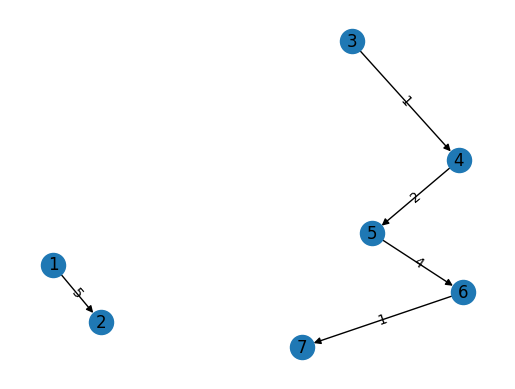

In [4]:
# For undirected graph, DiGraph() for directed
DG = nx.DiGraph()
edges = [(1, 2, 5), (3, 4, 1), (4, 5, 2), (5, 6, 4), (6, 7, 1)]
DG.add_weighted_edges_from(edges)
pos = nx.spring_layout(DG,k=0.55,iterations=20)
   # k controls the distance between the nodes and varies between 0 and 1
    # iterations is the number of times simulated annealing is run
    # default k =0.1 and iterations=50
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos=pos,  edge_labels = weights)
nx.draw(DG, pos=pos, with_labels = True)

## Dijkstra's Algorithm - Naive Implementation

### Algorithm:

* Create a set X (shortest path tree set) that keeps track of vertices included in the shortest path tree, i.e., whose minimum distance from the source is calculated and finalized. Initially, this set is empty.
* Assign a distance value to all vertices in the input graph. Initialize all distance values as INFINITE. Assign the distance value as 0 for the source vertex so that it is picked first.
* While X doesn’t include all vertices
Pick a vertex u that is not in set X and has a minimum distance value.
Include u to X.
* Then update the distance value of all adjacent vertices of u.
* To update the distance values, iterate through all adjacent vertices.
* For every adjacent vertex v, if the sum of the distance value of u (from source) and weight of edge u-v, is less than the distance value of v, then update the distance value of v.

In [5]:
def dijkstra_naive(graph, source):
  #Naive implementation which does the following
  #
  # 1. For vertices in X, find all edges originating from them to all vertices not in X
  # 2. Keep track of minimum value of len(w) + lwv
  # 3. Return w, v and lwv
  X = set() # Add source to set X
  X.add(source)
  A = {}
  all_nodes = list(graph.nodes)
  A[source] = 0
  minimum_2nd_overall = float('inf')
  w_overall = float('inf')
  # Loop over all the nodes
  while len(X) != len(all_nodes):
    for edge in list(graph.edges):
      if edge[0] in X and edge[1] not in X:
        dji_greedy = A[edge[0]] + graph.edges[edge[0], edge[1]]['weight'] #djikstra's greedy criterion
        if edge[1] not in A:
          A[edge[1]] = dji_greedy
        elif dji_greedy < A[edge[1]]:
          A[edge[1]] = dji_greedy
        if dji_greedy < minimum_2nd_overall:
          minimum_2nd_overall = dji_greedy
          w_overall = edge[1]
    minimum_2nd_overall = float('inf')
    X.add(w_overall)

  print("Printing minimum distances from starting vertex {}".format(source))
  for node in A:
    print("Vertex {} is a distance {}".format(node, A[node]))


Printing minimum distances from starting vertex 1
Vertex 1 is a distance 0
Vertex 2 is a distance 1
Vertex 3 is a distance 3
Vertex 4 is a distance 6


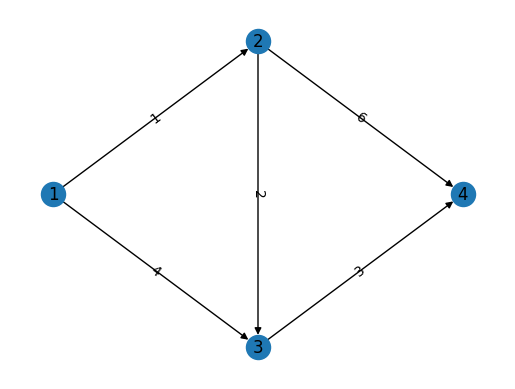

In [6]:
DG = nx.DiGraph()
DG.add_node(1, pos = (0, 5))
DG.add_node(2, pos = (7, 10))
DG.add_node(3, pos = (7, 0))
DG.add_node(4, pos = (14, 5))
DG.add_edge(1, 2, weight = 1)
DG.add_edge(2, 3, weight = 2)
DG.add_edge(3, 4, weight = 3)
DG.add_edge(1, 3, weight = 4)
DG.add_edge(2, 4, weight = 6)
pos = nx.get_node_attributes(DG, 'pos')
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw(DG, pos, with_labels = True)

dijkstra_naive(DG, 1)

Printing minimum distances from starting vertex s
Vertex s is a distance 0
Vertex v is a distance 1
Vertex w is a distance 3
Vertex t is a distance 6


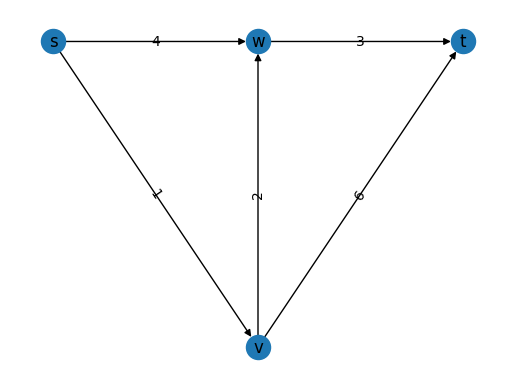

In [7]:
# Trying with a string name
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (5, 5))
g.add_node('t', pos = (10, 5))
g.add_edge('s', 'v', weight = 1)
g.add_edge('v', 't', weight = 6)
g.add_edge('s', 'w', weight = 4)
g.add_edge('v', 'w', weight = 2)
g.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
dijkstra_naive(g, start_vert)

## Challenge Problems

## Assignment Problem

In this programming problem you'll code up Dijkstra's shortest-path algorithm.

Download the following text file:

The file contains an adjacency list representation of an undirected weighted graph with 200 vertices labeled 1 to 200.  Each row consists of the node tuples that are adjacent to that particular vertex along with the length of that edge. For example, the 6th row has 6 as the first entry indicating that this row corresponds to the vertex labeled 6. The next entry of this row "141,8200" indicates that there is an edge between vertex 6 and vertex 141 that has length 8200.  The rest of the pairs of this row indicate the other vertices adjacent to vertex 6 and the lengths of the corresponding edges.

Your task is to run Dijkstra's shortest-path algorithm on this graph, using 1 (the first vertex) as the source vertex, and to compute the shortest-path distances between 1 and every other vertex of the graph. If there is no path between a vertex **v** and vertex **1**, we'll define the shortest-path distance between **1** and
**v** to be **1000000**.

You should report the shortest-path distances to the following ten vertices, in order: **7,37,59,82,99,115,133,165,188,197**.  You should encode the distances as a comma-separated string of integers. So if you find that all ten of these vertices except 115 are at distance 1000 away from vertex 1 and 115 is 2000 distance away, then your answer should be 1000,1000,1000,1000,1000,2000,1000,1000,1000,1000. Remember the order of reporting DOES MATTER, and the string should be in the same order in which the above ten vertices are given. The string should not contain any spaces.  Please type your answer in the space provided.

IMPLEMENTATION NOTES: This graph is small enough that the straightforward *O(mn)* time implementation of Dijkstra's algorithm should work fine.  OPTIONAL: For those of you seeking an additional challenge, try implementing the heap-based version.  Note this requires a heap that supports deletions, and you'll probably need to maintain some kind of mapping between vertices and their positions in the heap.

#### Naive Implementation O(mn)

In [8]:
def undirected_dijkstra_naive(G, source, destination):
  X = set()
  X.add(source)
  A = {}
  A[source] = 0
  all_nodes = list(G.nodes)
  minimum_2nd_overall = float('inf')
  w_overall = float('inf')
  while len(X) != len(all_nodes):
    for edge in list(G.edges):
      if (edge[0] in X) and (edge[1] not in X):
        edge_tail = edge[0]
        edge_head = edge[1]
      elif (edge[1] in X) and (edge[0] not in X):
        edge_tail = edge[1]
        edge_head = edge[0]
      if ((edge_tail in X) and (edge_head not in X)) :
        dji_greedy = A[edge_tail] + G.edges[edge_tail, edge_head]['weight'] #djikstra's greedy criterion
        if edge_head not in A:
          A[edge_head] = dji_greedy
        elif dji_greedy < A[edge_head]:
          A[edge_head] = dji_greedy
        if dji_greedy < minimum_2nd_overall:
          minimum_2nd_overall = dji_greedy
          w_overall = edge_head
    minimum_2nd_overall = float('inf')
    X.add(w_overall)
  print("Printing minimum distances from starting vertex {}".format(source))
  for node in destination:
    print("Vertex {} is at distance {}".format(node, A[node]))

#### Heap Implementation: there are always more edges in the heap, since I don't remove the edge until it comes on top. The performance is not enhanced.

In [13]:
def undirected_dijkstra_heap(G, source, destination):
  X = set()
  X.add(source)
  minHeap = []
  heapq.heappush(minHeap, [0, source])
  all_nodes = list(G.nodes)
  # Initilialize all nodes distance to be infinity
  A = {}
  for node in all_nodes:
    A[node] = float('inf')
  A[source] =  0

  # Start the loop
  while len(minHeap) != 0:
    w = heapq.heappop(minHeap)
    # If the node already in X, then ignore
    if w[1] in X and w[1]!=source:
      continue
    X.add(w[1])
    A[w[1]] = w[0]

    # Go through all the edges from X to V-X and add them to heap
    for edge in list(G.edges):
      if (edge[0] in X) and (edge[1] not in X):
        edge_tail = edge[0]
        edge_head = edge[1]
      elif (edge[1] in X) and (edge[0] not in X):
        edge_tail = edge[1]
        edge_head = edge[0]
      else:
        continue
      if ((edge_tail in X) and (edge_head not in X)) :
        dji_greedy = A[edge_tail] + G.edges[edge_tail, edge_head]['weight'] #djikstra's greedy criterion
        heapq.heappush(minHeap, [dji_greedy, edge_head])

  # Hopefully all things are okay, lets print
  print("Printing minimum distances from starting vertex {}".format(source))
  for node in destination:
    print("Vertex {} is at distance {}".format(node, A[node]))

#### Heap based solution:
I picked it up from here: https://github.com/aishwarya34/AlgorithmsIlluminated/blob/master/C2W2_11DIJKSTRA'S_SHORTEST-PATH_ALGORITHM.ipynb

Only marginally better than array based implementation.

In [37]:
def undirected_dijkstra_heap2(DG, source, destination):
  #Heap implementation which does the following
  #
  # 1. For vertices in X, find all edges originating from them to all vertices not in X
  # 2. Keep track of minimum value of len(w) + lwv
  # 3. Return w, v and lwv
  X = [source]
  minHeap = []
  heapq.heappush(minHeap, [0, source])
  all_nodes = list(DG.nodes)
  for node in all_nodes:
    DG.nodes[node]['shortest_dist'] = float('inf')
  while len(minHeap) != 0:
    w = heapq.heappop(minHeap)
    X.append(w[1])
    DG.nodes[w[1]]['shortest_dist'] = w[0]
    for edge in list(DG.edges):
      if (edge[0] == w[1]) and (edge[1] not in X):
        edge_tail = edge[0]
        edge_head = edge[1]
      elif (edge[1] == w[1]) and (edge[0] not in X):
        edge_tail = edge[1]
        edge_head = edge[0]
      else:
        continue
      if ((edge_tail == w[1]) and (edge_head not in X)) : # node that has just been popped should be the tail
        dji_greedy = w[0] + DG.edges[edge_tail, edge_head]['weight'] #djikstra's greedy criterion
        if len(minHeap) == 0:
          heapq.heappush(minHeap, [dji_greedy, edge_head])
          continue
        singlenp = [i[1] for i in minHeap]
        if edge_head not in singlenp:
          heapq.heappush(minHeap, [dji_greedy, edge_head])
        else:
          dest_idx = singlenp.index(edge_head)
          if dji_greedy < minHeap[dest_idx][0]:
            minHeap[dest_idx] = minHeap[0]
            heapq.heapify(minHeap)
            heapq.heappop(minHeap)
            heapq.heappush(minHeap, [dji_greedy, edge_head])
  #print("Printing minimum distances from starting vertex \'{}\'".format(source))
  for node in destination:
    print("Vertex {} is at distance {}".format(node, DG.nodes[node]['shortest_dist']))


Printing minimum distances from starting vertex s
Vertex e is at distance 16
Vertex i is at distance 9
Vertex t is at distance 8
Vertex a is at distance 5


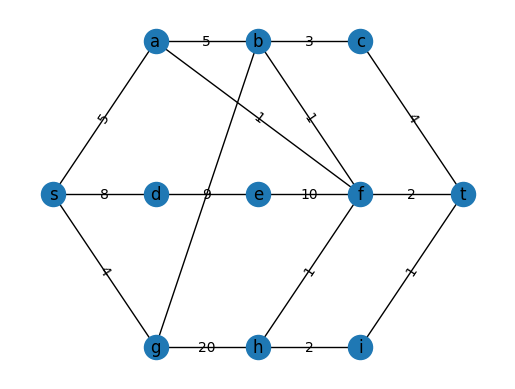

In [27]:
# Test 1
g = nx.Graph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = 5)
g.add_edge('a', 'b', weight = 5)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = 8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('b', 'g', weight = 1)
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)

pos = nx.get_node_attributes(g, 'pos')
weights =nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)


dest_verts = ['e', 'i', 't', 'a']
undirected_dijkstra_naive(g, 's', dest_verts)

In [31]:
undirected_dijkstra_heap(g, 's', dest_verts)

Printing minimum distances from starting vertex s
Vertex e is at distance 16
Vertex i is at distance 9
Vertex t is at distance 8
Vertex a is at distance 5


In [38]:
undirected_dijkstra_heap2(g, 's', dest_verts)

Vertex e is at distance 16
Vertex i is at distance 9
Vertex t is at distance 8
Vertex a is at distance 5


#### Answer for string nodes graph:
Printing minimum distances from starting vertex s

Vertex e is at distance 16

Vertex i is at distance 9

Vertex t is at distance 8

Vertex a is at distance 5

In [15]:
http = urllib3.PoolManager()
r1 = http.request('GET', "https://d3c33hcgiwev3.cloudfront.net/_dcf1d02570e57d23ab526b1e33ba6f12_dijkstraData.txt?Expires=1712966400&Signature=XLc5V-dDHaBOEwE4nrlFV8t0hktUrdDwhxquhmqIXaD8~RfkNPyvp6BbdJrY-fZkPR9f1EgS~~m6I18nAYveWY7uaMtq7Xt24JcsWv4zc0-y~6bWZroMnjCxJZzohOqkbbaSflUZvZaph7w43AwJQsF5Fvi-vJ7fVeHTkUF~tMs_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A")
IntegerMatrixStringJoin = r1.data.decode('utf8').split('\r\n')
IntegerMatrixStringJoin.remove('')
edges = []
for i in IntegerMatrixStringJoin:
  node_edges = i.split('\t')
  sourceint = int(node_edges[0])
  dest_list = node_edges[1:-1]
  for edstr in dest_list:
    edlist = edstr.split(',')
    destint = int(edlist[0])
    edgeweight = int(edlist[1])
    edges.append((sourceint, destint, edgeweight))
print(edges)

[(1, 80, 982), (1, 163, 8164), (1, 170, 2620), (1, 145, 648), (1, 200, 8021), (1, 173, 2069), (1, 92, 647), (1, 26, 4122), (1, 140, 546), (1, 11, 1913), (1, 160, 6461), (1, 27, 7905), (1, 40, 9047), (1, 150, 2183), (1, 61, 9146), (1, 159, 7420), (1, 198, 1724), (1, 114, 508), (1, 104, 6647), (1, 30, 4612), (1, 99, 2367), (1, 138, 7896), (1, 169, 8700), (1, 49, 2437), (1, 125, 2909), (1, 117, 2597), (1, 55, 6399), (2, 42, 1689), (2, 127, 9365), (2, 5, 8026), (2, 170, 9342), (2, 131, 7005), (2, 172, 1438), (2, 34, 315), (2, 30, 2455), (2, 26, 2328), (2, 6, 8847), (2, 11, 1873), (2, 17, 5409), (2, 157, 8643), (2, 159, 1397), (2, 142, 7731), (2, 182, 7908), (2, 93, 8177), (3, 57, 1239), (3, 101, 3381), (3, 43, 7313), (3, 41, 7212), (3, 91, 2483), (3, 31, 3031), (3, 167, 3877), (3, 106, 6521), (3, 76, 7729), (3, 122, 9640), (3, 144, 285), (3, 44, 2165), (3, 6, 9006), (3, 177, 7097), (3, 119, 7711), (4, 162, 3924), (4, 70, 5285), (4, 195, 2490), (4, 72, 6508), (4, 126, 2625), (4, 121, 7639),

In [16]:
## get the dijkstraData.txt file
def testcase():
  challenge_graph = nx.Graph()
  http = urllib3.PoolManager()
  r1 = http.request('GET', "https://d3c33hcgiwev3.cloudfront.net/_dcf1d02570e57d23ab526b1e33ba6f12_dijkstraData.txt?Expires=1712966400&Signature=XLc5V-dDHaBOEwE4nrlFV8t0hktUrdDwhxquhmqIXaD8~RfkNPyvp6BbdJrY-fZkPR9f1EgS~~m6I18nAYveWY7uaMtq7Xt24JcsWv4zc0-y~6bWZroMnjCxJZzohOqkbbaSflUZvZaph7w43AwJQsF5Fvi-vJ7fVeHTkUF~tMs_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A")
  #https://d3c33hcgiwev3.cloudfront.net/_dcf1d02570e57d23ab526b1e33ba6f12_dijkstraData.txt?Expires=1712966400&Signature=XLc5V-dDHaBOEwE4nrlFV8t0hktUrdDwhxquhmqIXaD8~RfkNPyvp6BbdJrY-fZkPR9f1EgS~~m6I18nAYveWY7uaMtq7Xt24JcsWv4zc0-y~6bWZroMnjCxJZzohOqkbbaSflUZvZaph7w43AwJQsF5Fvi-vJ7fVeHTkUF~tMs_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A
  IntegerMatrixStringJoin = r1.data.decode('utf8').split('\r\n')
  IntegerMatrixStringJoin.remove('')
  edges = []
  for i in IntegerMatrixStringJoin:
    node_edges = i.split('\t')
    sourceint = int(node_edges[0])
    dest_list = node_edges[1:-1]
    for edstr in dest_list:
      edlist = edstr.split(',')
      destint = int(edlist[0])
      edgeweight = int(edlist[1])
      edges.append((sourceint, destint, edgeweight))
  challenge_graph.add_weighted_edges_from(edges)
  nx.draw(challenge_graph, with_labels = True)
  return challenge_graph

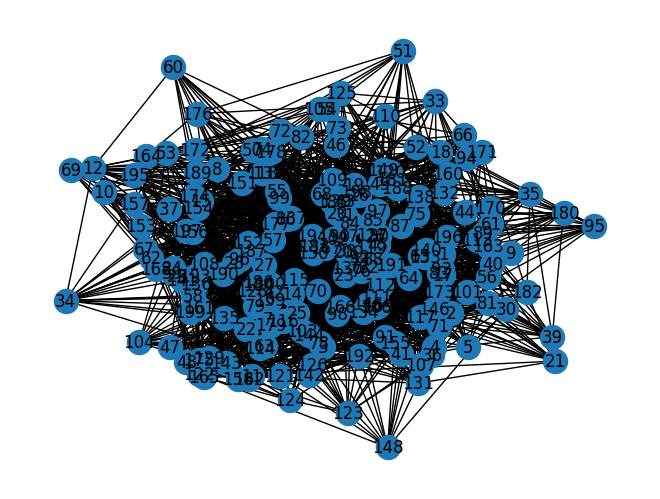

In [17]:
testcase()

Printing minimum distances from starting vertex 1
Vertex 7 is at distance 2599
Vertex 37 is at distance 2610
Vertex 59 is at distance 2947
Vertex 82 is at distance 2052
Vertex 99 is at distance 2367
Vertex 115 is at distance 2399
Vertex 133 is at distance 2029
Vertex 165 is at distance 2442
Vertex 188 is at distance 2505
Vertex 197 is at distance 3068
0.6491060256958008


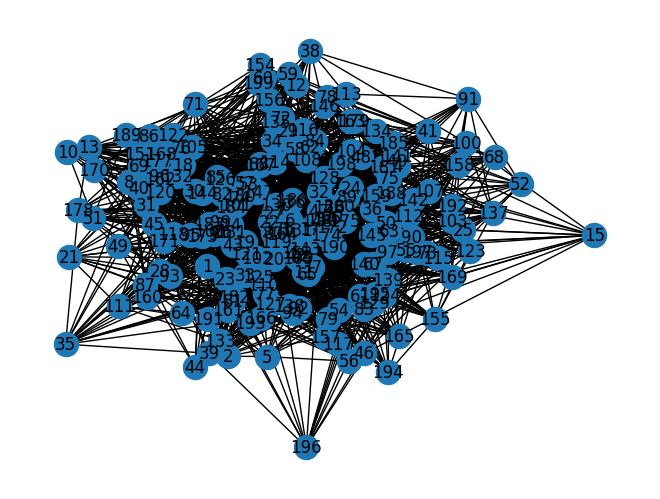

In [18]:
from pickle import TUPLE2
dest_verts = [7,37,59,82,99,115,133,165,188,197]
t1 = time.time()
undirected_dijkstra_naive(testcase(), 1 , dest_verts)
t2 = time.time()
print(t2-t1)

#### Answer:
Printing minimum distances from starting vertex 1

Vertex 7 is at distance 2599

Vertex 37 is at distance 2610

Vertex 59 is at distance 2947

Vertex 82 is at distance 2052

Vertex 99 is at distance 2367

Vertex 115 is at distance 2399

Vertex 133 is at distance 2029

Vertex 165 is at distance 2442

Vertex 188 is at distance 2505

Vertex 197 is at distance 3068


Printing minimum distances from starting vertex 1
Vertex 7 is at distance 2599
Vertex 37 is at distance 2610
Vertex 59 is at distance 2947
Vertex 82 is at distance 2052
Vertex 99 is at distance 2367
Vertex 115 is at distance 2399
Vertex 133 is at distance 2029
Vertex 165 is at distance 2442
Vertex 188 is at distance 2505
Vertex 197 is at distance 3068
1.1430847644805908


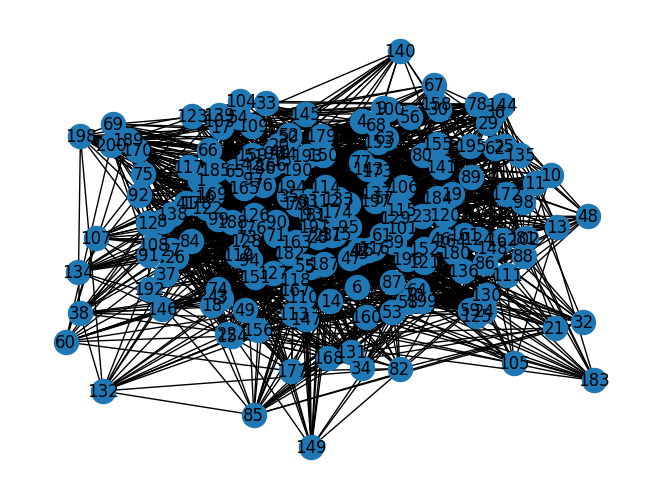

In [40]:
from pickle import TUPLE2
dest_verts = [7,37,59,82,99,115,133,165,188,197]
t1 = time.time()
undirected_dijkstra_heap(testcase(), 1 , dest_verts)
t2 = time.time()
print(t2-t1)

Vertex 7 is at distance 2599
Vertex 37 is at distance 2610
Vertex 59 is at distance 2947
Vertex 82 is at distance 2052
Vertex 99 is at distance 2367
Vertex 115 is at distance 2399
Vertex 133 is at distance 2029
Vertex 165 is at distance 2442
Vertex 188 is at distance 2505
Vertex 197 is at distance 3068
0.6429493427276611


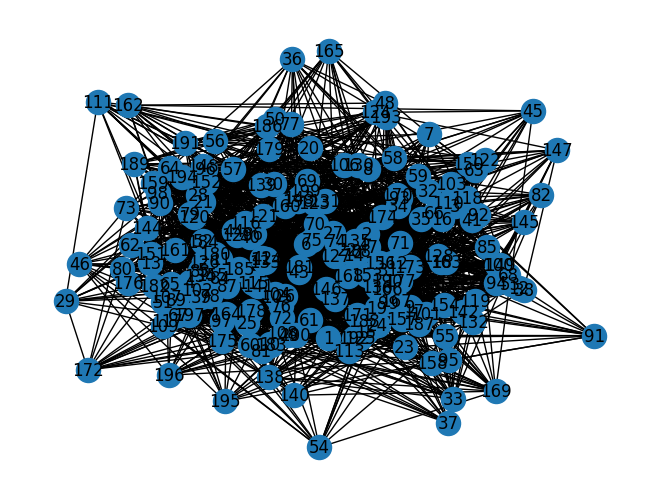

In [43]:
from pickle import TUPLE2
dest_verts = [7,37,59,82,99,115,133,165,188,197]
t1 = time.time()
undirected_dijkstra_heap2(testcase(), 1 , dest_verts)
t2 = time.time()
print(t2-t1)